In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
df['company'] = le.fit_transform(df.company)

In [5]:
df['job'] = le.fit_transform(df.job)
df['degree'] = le.fit_transform(df.degree)

In [6]:
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [8]:
x = df.drop('salary_more_then_100k', axis=1)
y = df['salary_more_then_100k']

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
dtc = DecisionTreeClassifier()
dtc.fit(x,y)

NameError: name 'x' is not defined

In [11]:
dtc.predict([[2,1,0]])

array([0])

In [12]:
dtc.predict([[2,1,1]])

array([1])

# test

In [13]:
test_df = pd.read_csv('titanic.csv')
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
test_df.isnull().Embarked.any()

True

In [39]:
test_df.isna().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [40]:
test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [67]:
test_df.Sex = test_df.Sex.map({'male':1, 'female':2})

In [68]:
test_df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
dtype: bool

In [69]:
test_df['Age'] = test_df['Age'].fillna(test_df.Age.mean())

In [70]:
test_df.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
dtype: bool

In [71]:
test_df.corr()

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.338481,0.543351,-0.069809,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.331339,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.084153,0.182333
Age,-0.069809,-0.331339,-0.084153,1.000000,0.091566
Fare,0.257307,-0.549500,0.182333,0.091566,1.000000


In [72]:
x = test_df.drop('Survived', axis=1)
y = test_df.Survived

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size = 0.2)

In [81]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1])

In [83]:
model.score(X_test, y_test)

0.8324022346368715

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
cm = confusion_matrix(y_test, y_pred)

In [87]:
cm

array([[94, 14],
       [16, 55]])

Text(33.0, 0.5, 'Truth')

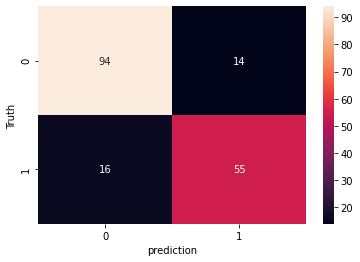

In [90]:
sns.heatmap(cm, annot=True)
plt.xlabel('prediction')
plt.ylabel('Truth')